# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [154]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [155]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [156]:
# Save api_keys information and build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# get first city response information for further analysis reference
response = requests.get(query_url + city).json()
response

{'coord': {'lon': -159.32, 'lat': 22.08},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 79.75,
  'pressure': 1014,
  'humidity': 83,
  'temp_min': 78.01,
  'temp_max': 82.4},
 'visibility': 16093,
 'wind': {'speed': 5.82, 'deg': 180},
 'clouds': {'all': 1},
 'dt': 1573870879,
 'sys': {'type': 1,
  'id': 7873,
  'country': 'US',
  'sunrise': 1573836566,
  'sunset': 1573876474},
 'timezone': -36000,
 'id': 5848280,
 'name': 'Kapaa',
 'cod': 200}

In [157]:
# initiate city number
city_number = 1
set_number = 1

# set up lists to hold reponse data
city_name = []
country = []
lat = []
long = []
date = []
clouds = []
humidity = []
maxTemp = []
temp = []
wind = []

# print data report header
print(''*50)
print('Beginning Data Retrieval')
print("-"*50)

# Loop through the list of cities and perform a request for data on each
for city in cities:
    if city_number <= 50:
    
    # Try to access data that doesn't exist and continuing complete the report
        try:
            response = requests.get(query_url + city).json()
            city_name.append(response['name'])
            country.append(response['sys']['country'])
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            date.append(response['dt'])
            clouds.append(response['clouds']['all'])
            humidity.append(response['main']['humidity'])
            maxTemp.append(response['main']['temp_max'])
            temp.append(response['main']['temp'])
            wind.append(response['wind']['speed'])
                        
            # start printing report
            print(f'Processing Record {city_number} of set{set_number} | {city}')
            city_number = city_number + 1
        except KeyError:
            print(f'City not found. Skipping ...')
    else:
        city_number = 1
        # start another set of cities search
        set_number = set_number + 1

# print data report footer
print("-"*50)
print('Data Retrieval Complete')      
print('-'*50)



Beginning Data Retrieval
--------------------------------------------------
Processing Record 1 of set1 | georgetown
Processing Record 2 of set1 | cape town
Processing Record 3 of set1 | aldan
City not found. Skipping ...
Processing Record 4 of set1 | kapaa
Processing Record 5 of set1 | bonavista
Processing Record 6 of set1 | pevek
Processing Record 7 of set1 | kruisfontein
Processing Record 8 of set1 | punta arenas
Processing Record 9 of set1 | arraial do cabo
Processing Record 10 of set1 | batagay-alyta
Processing Record 11 of set1 | mount gambier
Processing Record 12 of set1 | bayan
Processing Record 13 of set1 | stuttgart
Processing Record 14 of set1 | morro bay
Processing Record 15 of set1 | ushuaia
Processing Record 16 of set1 | east london
Processing Record 17 of set1 | bluff
Processing Record 18 of set1 | saskylakh
Processing Record 19 of set1 | qaanaaq
Processing Record 20 of set1 | lavrentiya
Processing Record 21 of set1 | kamenskiy
City not found. Skipping ...
Processing Re

Processing Record 39 of set4 | kutum
Processing Record 40 of set4 | nyaunglebin
City not found. Skipping ...
Processing Record 41 of set4 | ucluelet
Processing Record 42 of set4 | muisne
Processing Record 43 of set4 | west bay
Processing Record 44 of set4 | escanaba
City not found. Skipping ...
Processing Record 45 of set4 | fortuna
Processing Record 46 of set4 | itoman
Processing Record 47 of set4 | aklavik
Processing Record 48 of set4 | rudiskes
Processing Record 49 of set4 | warrnambool
City not found. Skipping ...
Processing Record 50 of set4 | sioux lookout
Processing Record 1 of set5 | saint-felicien
City not found. Skipping ...
Processing Record 2 of set5 | surgut
Processing Record 3 of set5 | port macquarie
Processing Record 4 of set5 | souillac
City not found. Skipping ...
Processing Record 5 of set5 | dongsheng
Processing Record 6 of set5 | cascais
Processing Record 7 of set5 | dunedin
Processing Record 8 of set5 | nemuro
Processing Record 9 of set5 | gushikawa
Processing Rec

Processing Record 28 of set8 | skjervoy
Processing Record 29 of set8 | kununurra
Processing Record 30 of set8 | brusyliv
Processing Record 31 of set8 | abilene
Processing Record 32 of set8 | carbondale
Processing Record 33 of set8 | vershino-darasunskiy
Processing Record 34 of set8 | worland
City not found. Skipping ...
Processing Record 35 of set8 | vincennes
City not found. Skipping ...
Processing Record 36 of set8 | nesterov
Processing Record 37 of set8 | segou
Processing Record 38 of set8 | heinola
City not found. Skipping ...
Processing Record 39 of set8 | kishni
Processing Record 40 of set8 | zhigansk
City not found. Skipping ...
Processing Record 41 of set8 | paita
Processing Record 42 of set8 | leshukonskoye
Processing Record 43 of set8 | tuensang
Processing Record 44 of set8 | zhengjiatun
City not found. Skipping ...
City not found. Skipping ...
Processing Record 45 of set8 | tigil
Processing Record 46 of set8 | kudahuvadhoo
Processing Record 47 of set8 | nurota
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [158]:
# Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                             'Country': country,
                             'Lat': lat,
                             'Long': long,
                             'Date': date,
                             'Max Temp': maxTemp,
                             'Humidity': humidity,
                             'Cloudiness': clouds,
                             'Wind Speed': wind})

# export the city data into a .csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

In [159]:
city_data_df.count()

City          526
Country       526
Lat           526
Long          526
Date          526
Max Temp      526
Humidity      526
Cloudiness    526
Wind Speed    526
dtype: int64

In [160]:
city_data_df.head()

,City,Country,Lat,Long,Date,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,GY,6.80,-58.16,1573870986,82.40,100,20,4.70
1,Cape Town,ZA,-33.93,18.42,1573870739,66.00,77,20,21.92
2,Aldan,RU,58.61,125.39,1573870987,-13.14,92,100,3.22
3,Kapaa,US,22.08,-159.32,1573870879,82.40,83,1,5.82
4,Bonavista,CA,48.65,-53.11,1573870987,37.99,83,100,7.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

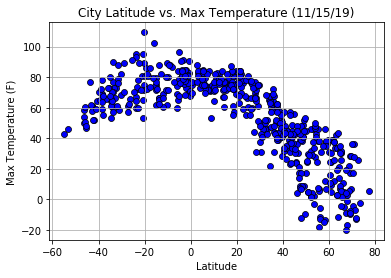

In [161]:
# plotting the data from the city data frame
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"], marker="o",
             facecolors = 'blue', edgecolors = 'black', linewidths = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (11/15/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temperature.png")

# Show plot
plt.show()

In [146]:
# d = date.today()
# print (d)

#### Latitude vs. Humidity Plot

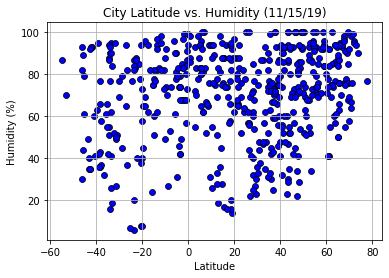

In [162]:
# plotting the data from the city data frame
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"], marker="o",
            facecolors = 'blue', edgecolors = 'black', linewidths = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (11/15/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

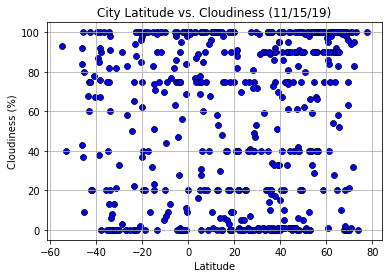

In [163]:
# plotting the data from the city data frame
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"], marker="o",
            facecolor = 'blue', edgecolors = 'black', linewidths = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11/15/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

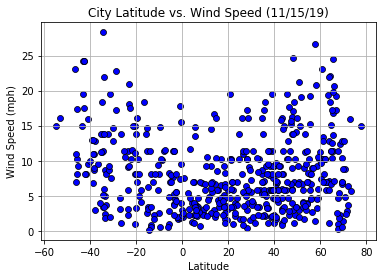

In [164]:
# plotting the data from the city data frame
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"], marker="o",
            facecolor = 'blue', edgecolors = 'black', linewidths = 0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11/15/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()